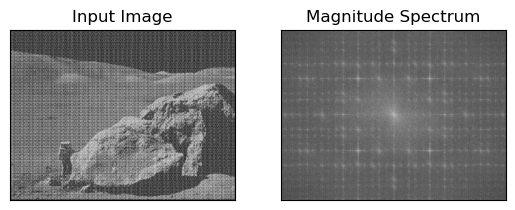

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

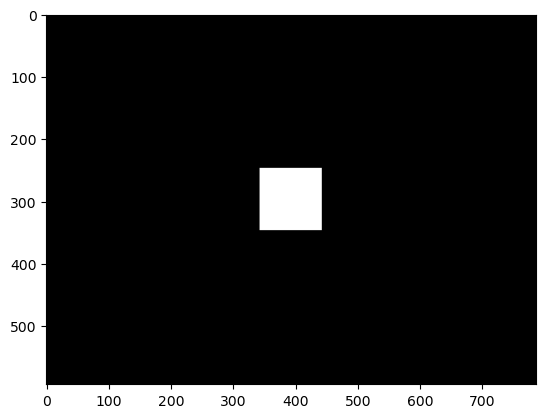

In [ ]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [ ]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\Evgenii\AppData\Local\Temp\ipykernel_21588\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


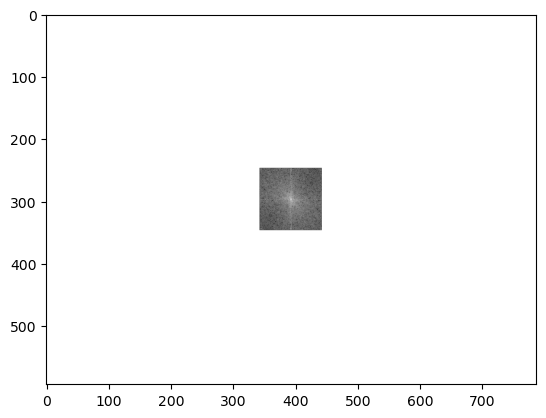

In [ ]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [ ]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

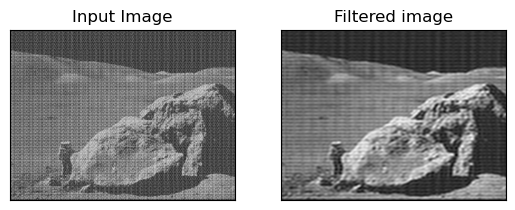

In [ ]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

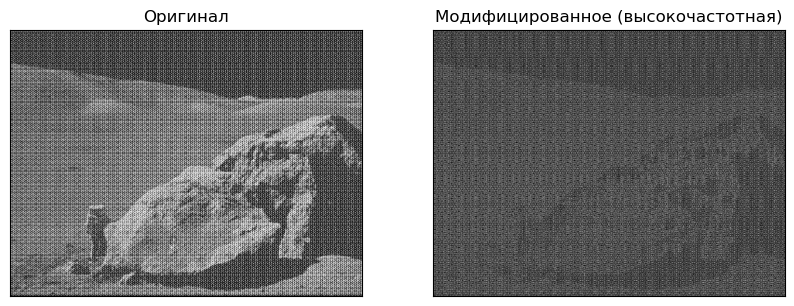

In [ ]:
import numpy as np
import cv2 as cv
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

# Высокочастотный фильтр
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))

sigma = 50  # степень сглаживания
gaussian_lowpass = np.exp(-((x - (cols // 2))**2 + (y - (rows // 2))**2) / (2 * sigma**2))
gaussian_highpass = 1 - gaussian_lowpass  # из низкочастотного в высокочастотный

dft_shift = dft_shift * gaussian_highpass[:, :, np.newaxis]
img_back = cv.idft(np.fft.ifftshift(dft_shift))
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize = (10, 5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Оригинал'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Модифицированное (высокочастотная)'), plt.xticks([]), plt.yticks([])
plt.show()

![](Figure2_4.png)

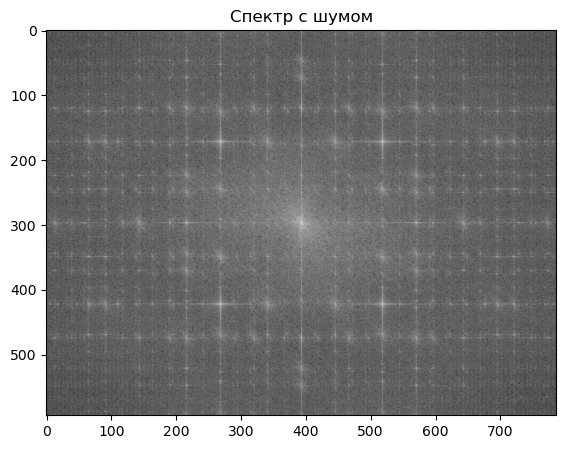

In [ ]:
# Удаление периодического шума
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.figure(figsize=(10,5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Спектр с шумом")
plt.show()

![](Figure2_2.png)

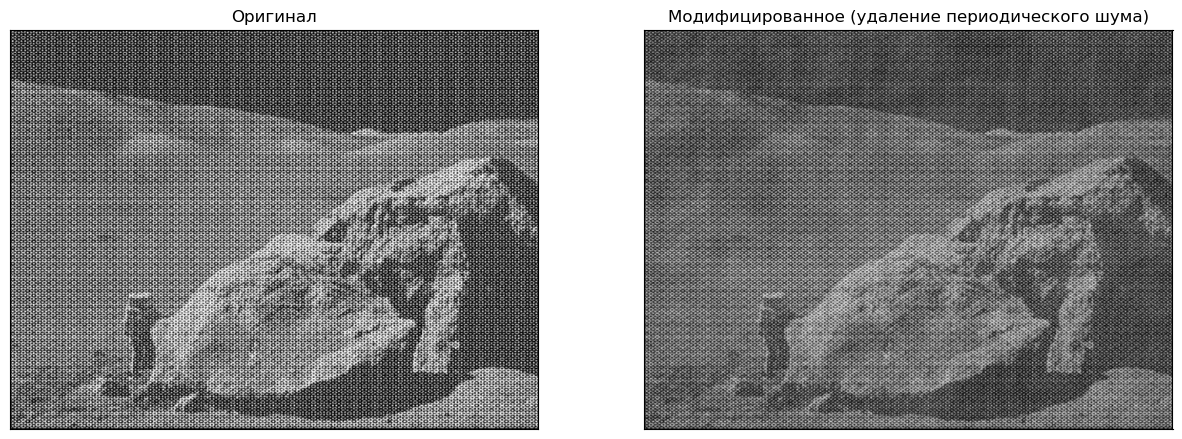

In [ ]:
local_max = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)
rows, cols = img.shape
mask = np.copy(dft_shift)
mask[:, :, :] = 1

for i in local_max:
    r = np.int32(((i[0] - rows // 2)**2 + (i[1] - cols // 2)**2)**(1 / 2))
    cv.circle(mask, (rows // 2, cols // 2), r, (0,0))

fshift = dft_shift * mask
img_back = cv.idft(np.fft.ifftshift(fshift))
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize = (15, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Оригинал'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Модифицированное (удаление периодического шума)'), plt.xticks([]), plt.yticks([])
plt.show()

![](Figure2_5.png)